In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import kurtosis, skew
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from scipy.stats import linregress
import pylab
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

plt.rcParams["figure.figsize"] = 8,4
import warnings
warnings.filterwarnings("ignore")

In [48]:
#df = pd.read_csv("../input/StudentsPerformance.csv")
df = pd.read_csv("StudentsPerformance.csv")

In [49]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
# Check for possible null values in the dataset as missing values potentially falsify the statistical models
df.isnull().sum()
# the dataset does not contain missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
df.describe()
# the describe method gives a quick overview of basic metrics of the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [52]:
df["gender"] = df["gender"].astype("category")
df["race/ethnicity"] = df["race/ethnicity"].astype("category")
df["parental level of education"] = df["parental level of education"].astype("category") 
df["lunch"] = df["lunch"].astype("category")
df["test preparation course"] = df["test preparation course"].astype("category") 

In [53]:
# to get a more generalised idea about performance we add a total score field to the dataset which sums up all exam scores
df["total"] = df["math score"] +df["reading score"]+df["writing score"]

# General Score Analysis

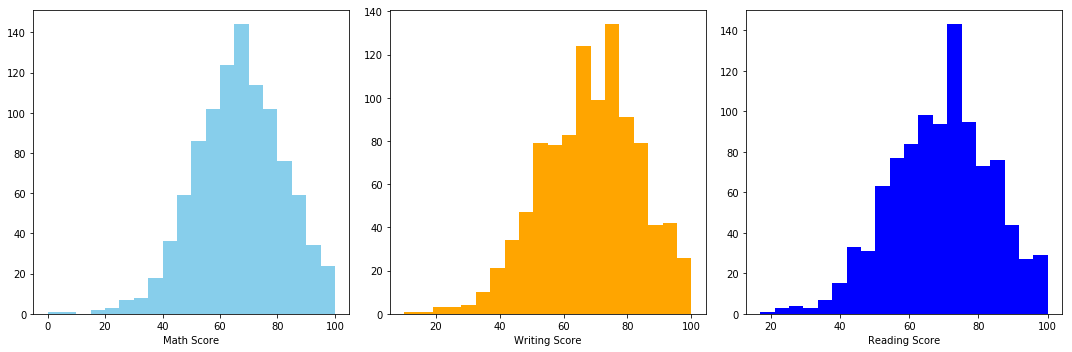

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].hist(df["math score"], bins=20,  color = "skyblue")
axes[0].set_xlabel("Math Score")
axes[1].hist(df["writing score"], bins=20,  color = "orange")
axes[1].set_xlabel("Writing Score")
axes[2].hist(df["reading score"], bins=20,  color = "blue")
axes[2].set_xlabel("Reading Score")

fig.tight_layout()


# Math Score Analysis

At first we want to conduct a univariate analysis of the the Math Score variable. This includes central tendency and normality checks. It is essential to know if a variable is normally distributed to see if parametric or non-parametric statistical tests need to be applied. <br>
As seen above Median and Mean of Math score are similar which would indicate a normally distributed dataset. However we want to further investigate if this is the case.

In [55]:
# investigate Skewness and Kurtosis
stats.describe(df["math score"])

DescribeResult(nobs=1000, minmax=(0, 100), mean=66.089, variance=229.91899799799796, skewness=-0.278516571914075, kurtosis=0.26759715461497846)

In [56]:
# To check for normality we need to get the standardized skweness and kurtosis scores
math_score_skew = skew(df["math score"])
print("Math score skweness: " , math_score_skew)
#standard error of skewness =SQRT(6/N)
standard_error_of_skewness = (6/ len(df["math score"])  ) ** 0.5
print("Standard error of skweness", standard_error_of_skewness)
print("Standardized skewness: ", math_score_skew / standard_error_of_skewness)

Math score skweness:  -0.278516571914075
Standard error of skweness 0.07745966692414834
Standardized skewness:  -3.595633482219976


Standardized scores for skewness and kurtosis between -2 and +2 prove normal univariate distribution. <br> 
In this case the standardized skewness score exceeds these limits so we need to further investigate to see if we can apply parametric tests. We will do this after doing the above test for kurtosis.

In [57]:
# a rough formula for the standard error for kurtosis is =SQRT(24/N)
standard_error_of_kurtosis = (24/  len(df["math score"]) )**0.5
print("Standard error of skewness" , standard_error_of_kurtosis)
print("Standardized kurtosis", kurtosis(df["math score"]) / standard_error_of_kurtosis )

Standard error of skewness 0.15491933384829668
Standardized kurtosis 1.7273322055271714


The standardized Kurtosis score for the variable Math score is within the boundaries of -2 and 2. However, we still need to investigate further as the standardized skew fell outside the -2 2 boundaries. At first we create a histogram to see how much Skew there is.

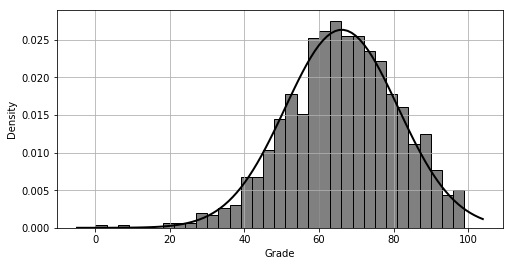

In [58]:
# plot histogram
plt.hist(df["math score"], bins= np.arange(0,100,3)   ,density=True ,color=['gray']  ,edgecolor='black', linewidth=1.0,)
plt.ylabel("Density")
plt.xlabel("Grade")

# plot normalverteilung
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df["math score"])
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.grid(True)
plt.show()

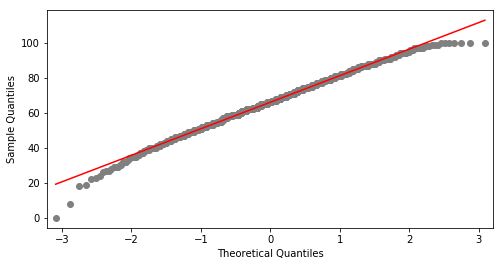

In [59]:
sm.qqplot(df["math score"], line ='s',color="grey" )
pylab.show()

Histogram and QQ-Plot both indicate a normal distribution. <br>
We can now investigate the impact of outliers. If at 0.05 level 95% of our standardized data is within the limits of +-1.96 we can treat it as normal. If sample size < 80 we can use +-2.58 as a boundary if it is larger we can use +-3.29 as a boundary.

In [60]:
sorted_standardized = sorted(preprocessing.scale(df["math score"]))
sorted_standardized_not_in1_96 = [i for i in sorted_standardized if (i > 1.96 or i < -1.96)]
print("Fall outside: ",len(sorted_standardized_not_in1_96)  )
print("Thats a total of ", round((len(sorted_standardized_not_in1_96)/ len(sorted_standardized)) *100,2) ,"%"  )

Fall outside:  51
Thats a total of  5.1 %


In [61]:
sorted_standardized = sorted(preprocessing.scale(df["math score"]))
sorted_standardized_not_in3_29 = [i for i in sorted_standardized if (i > 3.29 or i < -3.29)]
print("Fall outside: ",len(sorted_standardized_not_in3_29)  )
print("Thats a total of ", round((len(sorted_standardized_not_in3_29)/ len(sorted_standardized)) *100,2) ,"%"  )

Fall outside:  2
Thats a total of  0.2 %


As 0.2% < 5% we can treat our data as normal as we are confident that more than 95% of our standardized data falls within our ranges. <br>


# Reading Score analysis

In [64]:
# investigate Skewness and Kurtosis
stats.describe(df["reading score"])

DescribeResult(nobs=1000, minmax=(17, 100), mean=69.169, variance=213.16560460460462, skewness=-0.25871569927829347, kurtosis=-0.07391861478331307)

In [65]:
# To check for normality we need to get the standardized skweness and kurtosis scores
reading_score_skew = skew(df["reading score"])
print("reading score skweness: " , reading_score_skew)
#standard error of skewness =SQRT(6/N)
standard_error_of_skewness = (6/ len(df["reading score"])  ) ** 0.5
print("Standard error of skweness", standard_error_of_skewness)
print("Standardized skewness: ", reading_score_skew / standard_error_of_skewness)

reading score skweness:  -0.25871569927829347
Standard error of skweness 0.07745966692414834
Standardized skewness:  -3.340005315690789


Standardized score for skewness falls outside the boundaries of -2 and 2. therefore we need to investigate further to see if data is distributed normally.

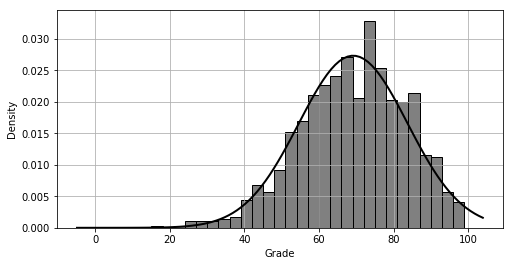

In [66]:
# plot histogram
plt.hist(df["reading score"], bins= np.arange(0,100,3)   ,density=True ,color=['gray']  ,edgecolor='black', linewidth=1.0,)
plt.ylabel("Density")
plt.xlabel("Grade")

# plot normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df["reading score"])
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.grid(True)
plt.show()

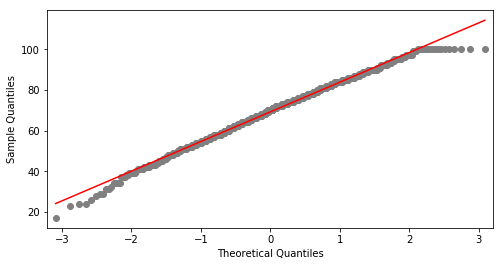

In [67]:
sm.qqplot(df["reading score"], line ='s',color="grey" )
pylab.show()

In [68]:
sorted_standardized = sorted(preprocessing.scale(df["reading score"]))
sorted_standardized_in1_96 = [i for i in sorted_standardized if (i > 1.96 or i < -1.96)] # get elements outside boundary
print("Fall outside: ",len(sorted_standardized_in1_96)  )
print("Thats a total of ", round((len(sorted_standardized_in1_96)/ len(sorted_standardized)) *100,2) ,"%"  )

Fall outside:  47
Thats a total of  4.7 %


We are confident that more than 95% of our data falls withing the boundary of 1.96 and can therefore assume normality.

We showed that we can treat both variables Math Score and Reading Score as normally distributed so we can investigate the correlation between the two variables using a parametric test such as the Pearson test.

In [71]:
result = linregress(df["math score"], df["reading score"])#
print(result)

LinregressResult(slope=0.7872292395756442, intercept=17.141806785685247, rvalue=0.8175796636720539, pvalue=1.787753109906726e-241, stderr=0.01755048889693828)


A correlation coefficient of 0.81 and a p-value < 0.01 indicates a very strong positive relationship.

In [72]:
# an alternative to get Pearson's correlation coefficient directly.
stats.pearsonr(df["math score"], df["reading score"])

(0.817579663672054, 1.787753109906955e-241)

To analyze other possible correlations without further drilling into univariate analysis of the writing score variable we can generate the below heatmap from the seaborn library for a more visual approach.

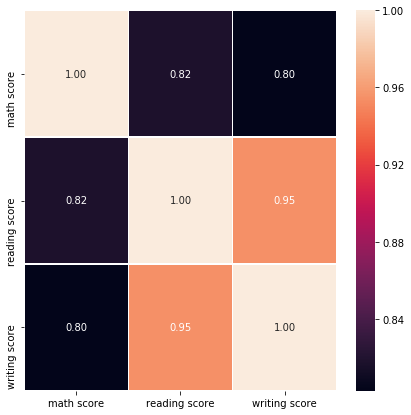

In [73]:
dfc= df.drop(columns= "total")
dfc.corr(method='pearson')
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dfc.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

The above Heatmap shows that there is a high correlation between writing and reading score. the correlation coefficient is smaller for math score and writing score but it is still considered a very strong relationship..

# Gender Analysis

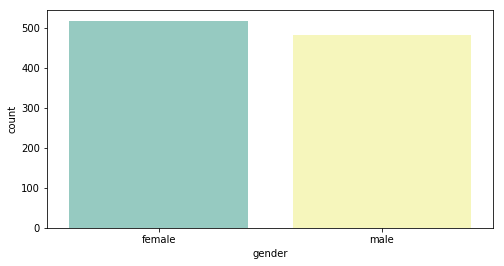

In [74]:
sns.countplot(x=df["gender"], palette="Set3")
# both genders are representated equally in the data sample

## Math Score Difference
In the next section we want to analyse if there is a statistically significant performance difference in math exams between male and female students. We will use an Independent T-Test as two unrelated groups (males/females) are compared. In order to conduct a t-test we first have to analyze Homogeneity of Variances using a Levene test.. We already proved normality of the data above.

In [75]:
df.groupby("gender")["math score"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


In [76]:
male = df[df["gender"] == "male" ]
male.reset_index(inplace= True)
female = df[df["gender"] == "female" ]
female.reset_index(inplace= True)

In [77]:
stats.levene(male["math score"] , female["math score"])

LeveneResult(statistic=0.3463686359706964, pvalue=0.55630915751998)

H0 Hypothesis in the Levene's test states that all variances are equal. In the above test we get a p-value >0.05 meaning an insignificant result. We can therefore accept H0 stating that Homogeneity of Variances is given.

In [78]:
t , p = stats.ttest_ind(male["math score"] , female["math score"] , equal_var = True)
print(stats.ttest_ind(male["math score"] , female["math score"] , equal_var = True))

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)


The t-test result is statistically significant as the p-value < 0.05. This means that there is a statistically significant difference in math exam performance between genders.

### Eta Squared Score 
To check our results we also calculate the effect using the eta_squared statistic. <br>
$\eta^{2} = \frac{t^2}{t^2 + (N1 + N2 + -2)}$ <br>

- 0.01 = small effect
- 0.06 = moderate effect
- 0.14 = large effect

In [79]:
n1 = len(male)
n2 = len(female)
eta_squared = (t**2)/ (t**2+ n1+ n2 - 2)
print(eta_squared)

0.0282180323172045


The Eta-Squared statistic indicated a small - moderate effect size (0.02)

## Comparison of exam results by gender

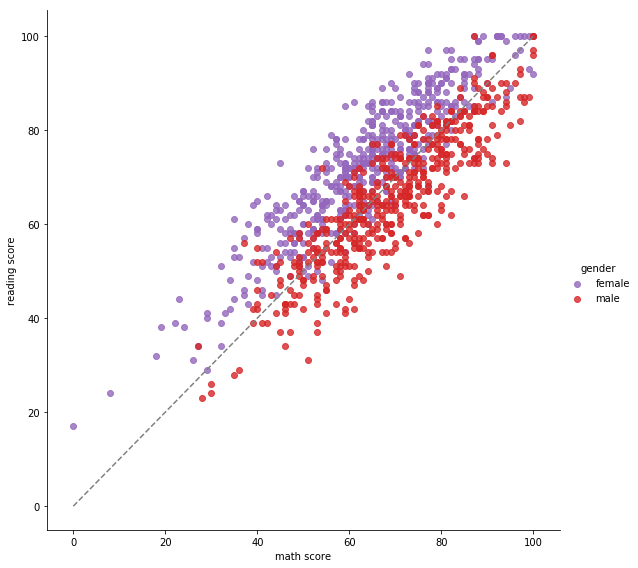

In [15]:
palette ={"male":"C3","female":"C4"}
vis1= sns.lmplot(data= df, x="math score", y="reading score", fit_reg=False,palette = palette, hue="gender", height=8, aspect=1)
vis1.ax.plot((0,100),(0,100) ,c="gray", ls="--")
plt.show()

The above scatter plot visualizes the high correlation between math and reading score. It can also be seen that the male data points tend to be located below the dashed line while females data point are rather located above.
In the example of a single person a point above the dashed line means that their reading score is higher than their math score.

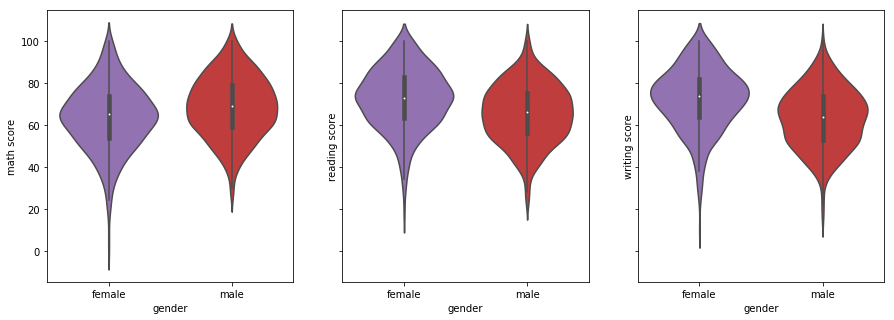

In [16]:
f, axes = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
w = sns.violinplot(data=df, x="gender", y="math score",palette = palette,ax=axes[0])
w = sns.violinplot(data=df, x="gender", y="reading score",ax=axes[1]  , palette = palette )
w = sns.violinplot(data=df, x="gender", y="writing score",ax=axes[2], palette = palette)

# Parental Level of Education Analysis

In [17]:
set(df["parental level of education"])
# these are the distinct values in the parental level of education column

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school'}

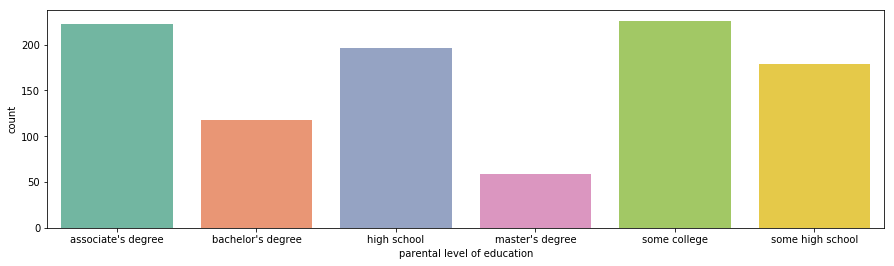

In [18]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x=df["parental level of education"], palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

In [19]:
len(df[df["parental level of education"]=="master's degree"]) # students where both parents obtain a master's degree

59

A significant smaller part (59 students) of students has parents where both mother and father graduated with a master degree. This has to be considered at a later stage when averages across all groups are calculated.

In [20]:
pl = df.groupby("parental level of education")
meanscore_byEducation =pl.mean()
medianscore_byEducation=pl.median()

In [21]:
cm = sns.light_palette("green", as_cmap=True)
s= meanscore_byEducation.style.background_gradient(cmap=cm)
s

,math score,reading score,writing score,total
parental level of education,,,,
associate's degree,67.8829,70.9279,69.8964,208.707
bachelor's degree,69.3898,73,73.3814,215.771
high school,62.1378,64.7041,62.449,189.291
master's degree,69.7458,75.3729,75.678,220.797
some college,67.1283,69.4602,68.8407,205.429
some high school,63.4972,66.9385,64.8883,195.324


The above table shows that there is a significant difference of student performance in exams for different levels of parent education. Students whose parents graduated with a Master's Degree perform significantly better that students whose parents went to High School only.

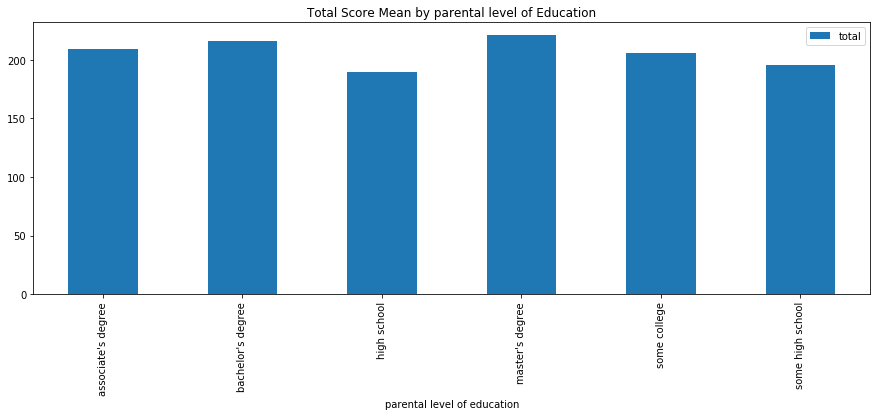

In [22]:
meanscore_byEducation.plot.bar(y="total",figsize=(15,5) )
plt.title("Total Score Mean by parental level of Education")
plt.show()

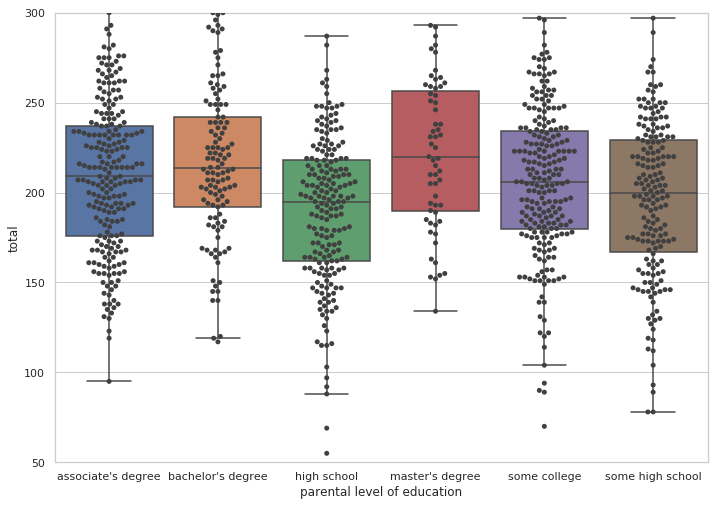

In [23]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="parental level of education", y="total", data=df, showfliers = False)
plt.gcf().set_size_inches(11.7, 8.27)
ax = sns.swarmplot(x="parental level of education", y="total", data=df, color=".25")
plt.ylim((50,300))
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

The above boxplot visualisez the significant better performance of students whose parent have a master's degree in comparison with students whose parent went to High School only.

# Test Preparation Course Analysis

In [24]:
df["test preparation course"].unique()

[none, completed]
Categories (2, object): [none, completed]

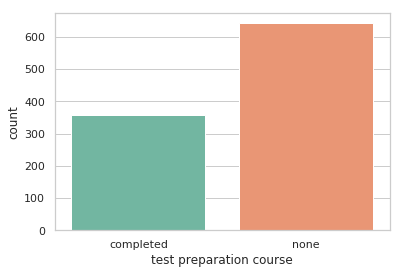

In [25]:
ax = sns.countplot(x=df["test preparation course"], palette="Set2")

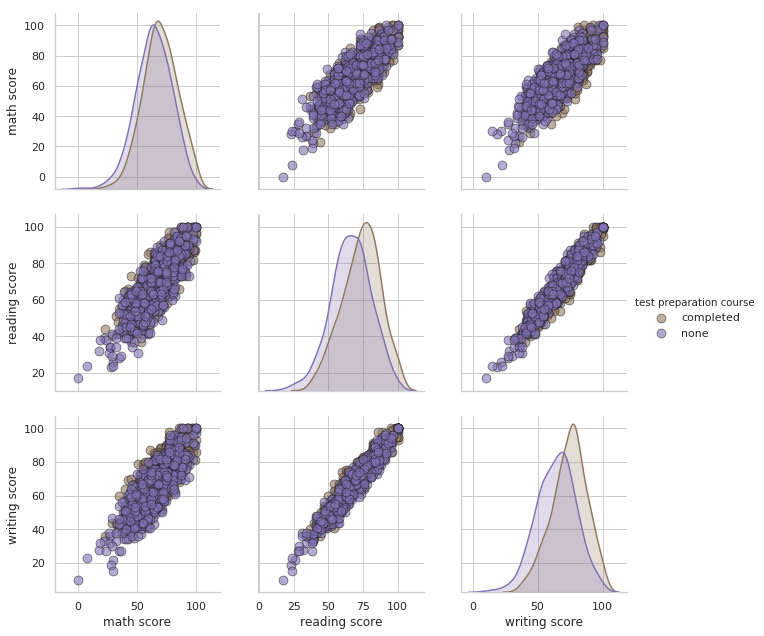

In [26]:
palette ={"completed":"C5","none":"C4"}
sns.pairplot(df.loc[:, df.columns != 'total'], hue="test preparation course", diag_kind="kde" , palette=palette,plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size=3)

In [27]:
prep =df.groupby("test preparation course")
prepare_mean = prep.mean()
prepare_mean

,math score,reading score,writing score,total
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822


Completing the preparation course seems to have a positive effect on the score for all three exams.

#  Logistic Regression

To get insights about students passing the math exam and to predict if students will fail the math exam we add an additional column. The grades are split as follows:
above 80 = A Grade <br>
70 to 80 = B Grade<br>
60 to 70 = C Grade<br>
50 to 60 = D Grade<br>
below 50 = Fail<br>

Note: These classificications are not based on real scenarious and are just defined for test purposes.

In [28]:
def failed(mathScore):
    if(mathScore<50): 
        return 1 # failed
    else: 
        return 0 # passed

In [29]:
#copy data model
prepared_Data = df
#insert column (independent variable)
y = list(map(failed, prepared_Data["math score"]))
prepared_Data["y"] = prepared_Data["math score"].apply(lambda x: failed(x) ) # variable to predict
#delete math score from model as math failed is directly dependent on it
prepared_Data = prepared_Data.drop(columns= ["math score","total", "lunch"] )
prepared_Data.head()

,gender,race/ethnicity,parental level of education,test preparation course,reading score,writing score,y
0,female,group B,bachelor's degree,none,72,74,0
1,female,group C,some college,completed,90,88,0
2,female,group B,master's degree,none,95,93,0
3,male,group A,associate's degree,none,57,44,1
4,male,group C,some college,none,78,75,0


In [30]:
total = len(prepared_Data)
failed = len(prepared_Data[prepared_Data["y"] ==1 ])
passed = len(prepared_Data[prepared_Data["y"] ==0 ])
print("Percentage of Students that failed maths:" + str(((failed/total)*100)) +"%")
print("Percentage of Students that passed the maths exam:" + str(((passed/total)*100))  +"%")

Percentage of Students that failed maths:13.5%
Percentage of Students that passed the maths exam:86.5%


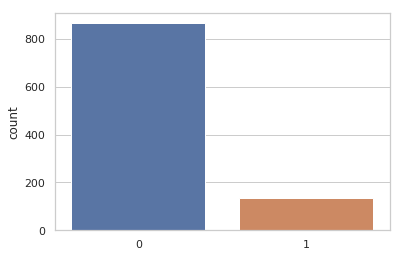

In [31]:
ax = sns.countplot( x=np.asarray(y))
rcParams['figure.figsize'] = 15, 5

We can see that the dataset is imbalanced which has to be considered when preparing the dataset and training the models.
There are a couple of methods to deal with imbalanced datasets such as oversampling the minority class, undersampling the majority class or changing the Machine Learning Algorithm to a model that performs well to imbalanced datasets such as Decision Trees.

In [32]:
grouped = prepared_Data.groupby("y").mean()
grouped

,reading score,writing score
y,,
0,72.243931,71.302890
1,49.466667,47.237037


We can already see that students who failed the math exam perform considerably worse in other exams as well.

In [33]:
#get categorical columns so we can generate dummy variables
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

catFilter = [  is_categorical(prepared_Data.iloc[:,i])  for i in range(0, len(prepared_Data.columns) )] 
categoricalCols = prepared_Data.columns[catFilter].tolist()
print(categoricalCols)    

['gender', 'race/ethnicity', 'parental level of education', 'test preparation course']


In [34]:
#Get dummy variables for al categorical columns
cat_vars= categoricalCols
for var in cat_vars:
    cat_list = "var"+"_" +var
    cat_list = pd.get_dummies(prepared_Data[var],drop_first=True, prefix=var)
    df1= prepared_Data.join(cat_list)
    prepared_Data= df1
    

In [35]:
#Remove original categorical columns
cat_vars= categoricalCols
data_vars=prepared_Data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
finalDf = prepared_Data[to_keep]

# Oversampling
Because the data set is imbalanced we apply one of the multiple options we have in order to deal with such imbalanced datasets - oversampling. It is important that this oversampling is only done on training data.

In [36]:
X = finalDf.loc[: , finalDf.columns != "y"]
y = finalDf.loc[: , finalDf.columns == "y"]
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train) #create oversampling on traning data only
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of passed",len(os_data_y[os_data_y['y']==0]))
print("Number of failed",len(os_data_y[os_data_y['y']==1]))
print("Proportion of passed data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of failed data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  1204
Number of passed 602
Number of failed 602
Proportion of passed data in oversampled data is  0.5
Proportion of failed data in oversampled data is  0.5


# Feature Scaling

The following used Machine Learning Algorithms Logistic Regression, SVM and Neural Networks perform usually better when features are on a similar scale and close to normal distribution.
As out dataset is normally distributed we will be using sklearn's standard scaler library.


In [37]:
print(y_train.shape)

(700, 1)


In [38]:
scaler = StandardScaler() #creates a scaler object
scaler = scaler.fit(os_data_X) #fits the object to our training data set
os_data_X = scaler.transform(os_data_X) #transforms the dataset into a scaled one
# the scaler object is now used to transform the test set as well
X_test = scaler.transform(X_test)

In [39]:
# RFE: this algorithm is used to pick relevant features and leave out features with with low significance to improve model performance.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
finalDf_vars=finalDf.columns.values.tolist()
y=['y']
X=[i for i in finalDf_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [40]:
X=os_data_X
y=os_data_y['y']

In [41]:
## Implementing the Model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.124230
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.821      
Dependent Variable: y                AIC:              325.1470   
Date:               2019-11-24 22:58 BIC:              391.3613   
No. Observations:   1204             Log-Likelihood:   -149.57    
Df Model:           12               LL-Null:          -834.55    
Df Residuals:       1191             LLR p-value:      4.1803e-286
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1      0.5877      0.6428     0.9143    0.3606    -0.6722     1.8477
x2     -6.4799      0.8345    -7.7653   

As the P-Value for x1  is above 0.05 we could remove that features from our model.

# Train Model

In [42]:
from sklearn import metrics

logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
logreg.fit(os_data_X, os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [44]:
# Creating the Confusion Matrix to visualize the model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

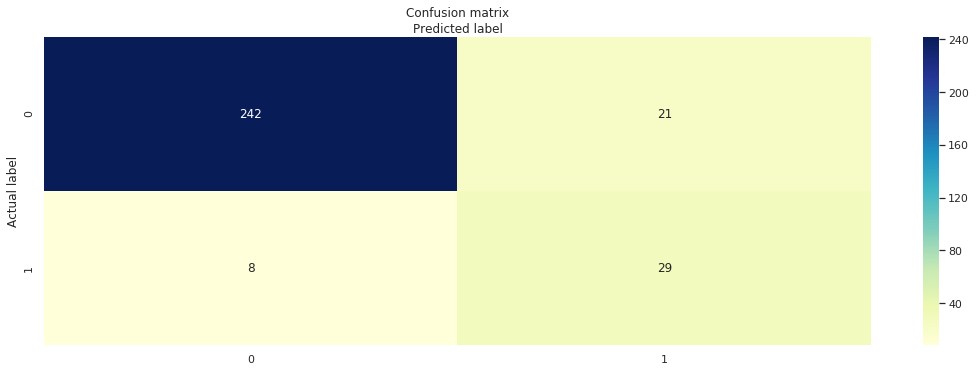

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The above Heatmap shows that our model predicted 242 + 29 cases correctly while 8 + 21 students were incorrectly classified.

In [46]:
# Applying k-Fold Cross Validation to test model performance accross different validation subsets
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = os_data_X, y = os_data_y, cv = 10, scoring="accuracy")
print(accuracies.mean() )
print(accuracies.std() )


0.9405737704918031
0.06371725879267091


In [47]:
#GRID SEARCH to find better hyperparameters
from sklearn.model_selection import GridSearchCV
parametersLog = [{'C':[0.01, 0.1,1,10,100,1000], 'penalty':["l1","l2"], 'fit_intercept':[True, False]  }]
grid_searchLog =GridSearchCV(estimator=logreg, 
                          param_grid = parametersLog,
                          scoring = "accuracy", cv=10, n_jobs=-1)
grid_searchLog = grid_searchLog.fit(os_data_X,os_data_y)
best_accuracyLog = grid_searchLog.best_score_
best_parametersLog = grid_searchLog.best_params_

In [48]:
print(best_accuracyLog)
print(best_parametersLog)

0.9443521594684385
{'C': 1, 'fit_intercept': False, 'penalty': 'l1'}


Setting the penalty prameter to "l1" could improve the model performance currently being set to l2.

In [49]:
# get precision and recall values to validate model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       263
           1       0.58      0.78      0.67        37

    accuracy                           0.90       300
   macro avg       0.77      0.85      0.81       300
weighted avg       0.92      0.90      0.91       300



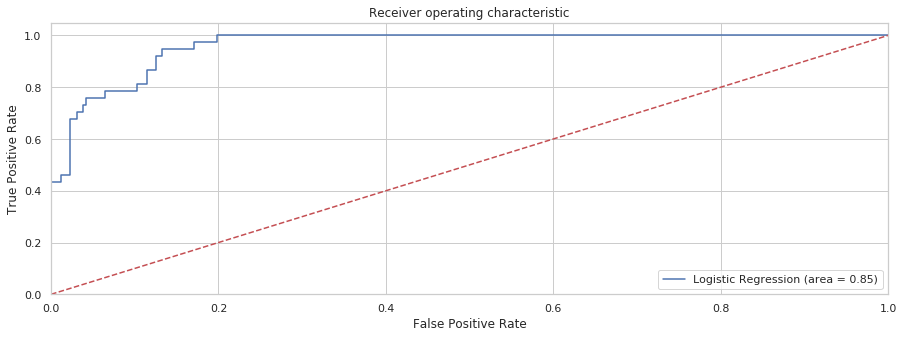

In [50]:
# display ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y']) # convert both sets into dataframes

In [52]:
#Analyse feature importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#X, y = X_train, y_train
X, y = os_data_X, os_data_y
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_ )

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

(1204, 13)
[0.31969989 0.28629253 0.07461354 0.02849929 0.03892826 0.05124702
 0.04111517 0.02416329 0.03463341 0.00890553 0.04759907 0.02112677
 0.02317624]


In [53]:
names = list(X.columns)
importance = clf.feature_importances_ 

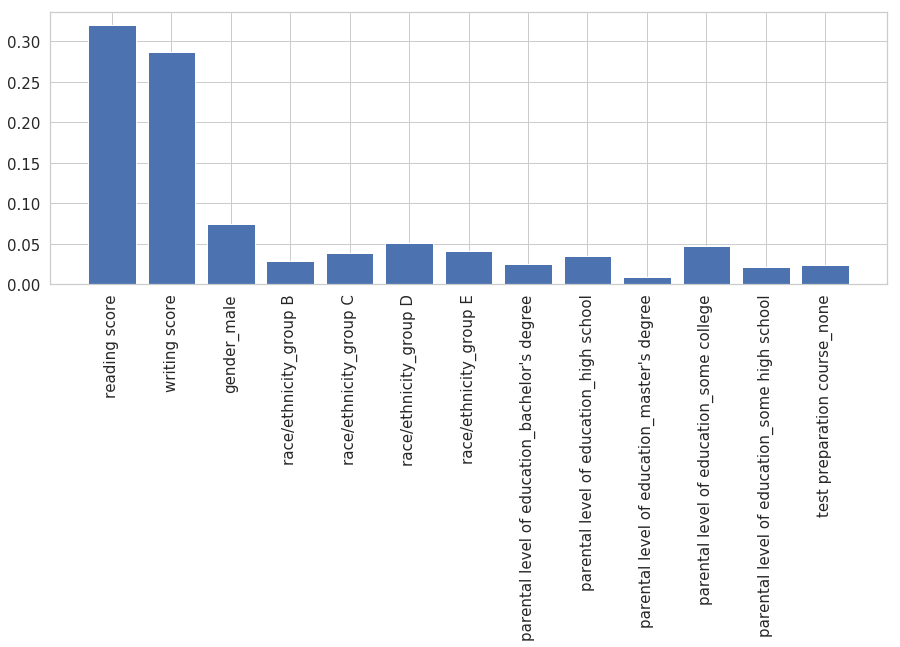

In [54]:
rcParams['figure.figsize'] = 15, 5
plt.bar(np.arange(len(names)), importance   )
plt.xticks(np.arange(len(names))  , names, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Reading and writing score are the best indicators to predict a students chance of failing the math exam.

# Neural network

In [55]:
#Build a neural network
import keras
from keras.models import Sequential
from keras.layers import Dense

X_train = os_data_X
y_train = os_data_y

#Initialising ANN
classifier = Sequential()
#Adding input Layer and first hidden layer
classifier.add(Dense(input_dim=13, output_dim = 6, init= 'uniform', activation='relu'))#uniform to init weights
#add second hidden layer
classifier.add(Dense( output_dim = 6, init= 'uniform', activation='relu'))
#add  output layer
classifier.add(Dense( output_dim = 1, init= 'uniform', activation='sigmoid'))
#compile ANN
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
#fitting ANN to trainning set
classifier.fit(X_train, y_train, batch_size=10, nb_epoch=100)





Epoch 1/100
1204/1204 [==============================] - 1s 547us/step - loss: 0.6744 - accuracy: 0.6819
Epoch 2/100
1204/1204 [==============================] - 0s 239us/step - loss: 0.4470 - accuracy: 0.9277
Epoch 3/100
1204/1204 [==============================] - 0s 218us/step - loss: 0.2394 - accuracy: 0.9410
Epoch 4/100
1204/1204 [==============================] - 0s 218us/step - loss: 0.1710 - accuracy: 0.9460
Epoch 5/100
1204/1204 [==============================] - 0s 209us/step - loss: 0.1499 - accuracy: 0.9485
Epoch 6/100
1204/1204 [==============================] - 0s 202us/step - loss: 0.1420 - accuracy: 0.9477
Epoch 7/100
1204/1204 [==============================] - 0s 207us/step - loss: 0.1370 - accuracy: 0.9477
Epoch 8/100
1204/1204 [==============================] - 0s 211us/step - loss: 0.1344 - accuracy: 0.9468
Epoch 9/100
1204/1204 [==============================] - 0s 208us/step - loss: 0.1317 - accuracy: 0.9493
Epoch 10/100
1204/1204 [==============================]

In [56]:
#predict test set results
y_pred = classifier.predict(X_test)
y_pred= [1 if i>0.5 else 0  for i in y_pred]

#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[247  16]
 [  8  29]]


In [57]:
accuracy_score = classifier.evaluate(X_test, y_test, verbose=0)[1]
accuracy_score

0.9200000166893005

# SVM Model

In [58]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear' , C=10)  
classifierSVM.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred2 = classifierSVM.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[247  16]
 [  8  29]]


In [60]:
accuraciesSVM = cross_val_score(estimator = classifierSVM, X = X_train, y = y_train, cv = 10)
print(accuraciesSVM.mean() )
print(accuraciesSVM.std() )

0.9430464480874317
0.05978578026531539


In [61]:
#GRID SEARCH to find best model and hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.1,1,10,100,1000], 'kernel':['linear']  },
               {'C':[0.1,10,100,1000], 'kernel':['rbf'], 'gamma':[0.5,0.1,0.01,0.001,0.0001]}]
grid_search =GridSearchCV(estimator=classifierSVM, 
                          param_grid = parameters,
                          scoring = "accuracy", cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [62]:
print(best_accuracy)
print(best_parameters)

0.9435215946843853
{'C': 100, 'kernel': 'linear'}


As we can see above the SVM could be slightly improved by adjusting the penalty parameter C to 100. 